In [2]:
%matplotlib inline
import mysql.connector as mysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
cnx = mysql.connect(user='root', password='galletas',
                              host='127.0.0.1',
                              database='iqblade')

In [4]:
cursor = cnx.cursor(named_tuple=True)

In [5]:
query = (
"Select * "
"from data_financials_all"
)

In [6]:
cursor.execute(query,10)
data = cursor.fetchall()
cnx.close()

In [7]:
d = pd.DataFrame(data)
d.head().T

,0,1,2,3,4
primary_type_id,ISV,ISV,ISV,ISV,ISV
financial_year,2013,2012,2014,2015,2014
turnover,19685000,14283000,18097000,17250000,93855756
export,1.816e+06,2.067e+06,1.71e+06,1.917e+06,1.57424e+06
cost_of_sales,4.222e+06,2.094e+06,3.771e+06,3.446e+06,NaN
gross_profit,1.5463e+07,1.2189e+07,1.4326e+07,1.3804e+07,NaN
wages_and_salaries,9.62e+06,8.831e+06,9.841e+06,9.721e+06,3.57439e+07
director_emoluments,NaN,NaN,NaN,NaN,1.34808e+06
operating_profit,2.38e+06,973000,1.1447e+07,530000,2.64502e+07
depreciation,386000,337000,293000,139000,7.06172e+06


What to do with the values that have **`Nan`** and **`None`**? What types are the columns?  
Apparently the `None` values is a pandas dataframe value for null values in object type columns. `Nan` values might be the same but for numeric only. 

In [8]:
# Cast away the object type
vars = d.columns[np.array(d.dtypes == 'object') & np.array(d.columns != 'primary_type_id')]
d[vars] = d[vars].select_dtypes(include=['object']).apply(pd.to_numeric)

In [9]:
d[d.columns.difference(['primary_type_id', 'financial_year', 'organisation_id'])] = d[d.columns.difference(['primary_type_id', 'financial_year', 'organisation_id'])].divide(d.turnover+0.0, axis = 'index')

In [10]:
# Let's see how many columns and rows we have
d.shape

(3210, 77)

In [11]:
# This column has None values
d.difference.isnull().sum()

3210

In [12]:
# This column has NaN
# This indeed checks that I queried all those that have non Null turnover
d.turnover.isnull().mean()

0.0

In [13]:
# This company has a turnover of 0... Should I exclude?
d[d.turnover.isnull()].organisation_id

Series([], Name: organisation_id, dtype: int64)

In [14]:
d.drop('financial_year', axis = 1, inplace= True)
d.drop('turnover', axis = 1, inplace= True)

In [15]:
d[d.organisation_id == 6]

,primary_type_id,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,auditfees,interest_payments,...,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,organisation_id,difference,revenue_growth_pct,dividends
2255,Reseller,NaN,NaN,NaN,0.100485,0.005395,0.042334,0.002359,0.000417,2.705573e-06,...,NaN,5.780087e-08,0.000176,NaN,4.509288e-08,NaN,6,NaN,1.436080e-07,NaN
2256,Reseller,NaN,NaN,NaN,0.102105,0.006268,0.041391,0.002321,0.000440,2.023479e-06,...,NaN,6.251643e-08,0.000179,NaN,4.756685e-08,NaN,6,NaN,1.074980e-07,NaN
2257,Reseller,NaN,NaN,NaN,0.130952,0.010142,0.027134,0.002946,0.000414,8.824260e-07,...,NaN,2.989218e-08,0.000090,NaN,2.393581e-08,NaN,6,NaN,NaN,NaN


In [16]:
df = pd.DataFrame(d.groupby(d.organisation_id).mean())
df.head()

,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,auditfees,interest_payments,pretax_profit,...,operating_costs_as_pct_gp,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,difference,revenue_growth_pct,dividends
organisation_id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,0.111181,0.007268,0.036953,0.002542,0.000424,0.000002,0.037111,...,NaN,NaN,5.006983e-08,0.000149,NaN,3.886518e-08,NaN,NaN,1.255530e-07,NaN
8,NaN,0.819144,0.180856,NaN,0.013570,0.030329,0.002214,0.001565,0.003525,0.026805,...,1.784453e-05,NaN,6.557139e-07,NaN,3.947146e-06,4.610850e-07,2.987997e-06,NaN,2.584742e-06,NaN
10,0.016964,0.867543,0.132457,0.118784,0.002866,0.014898,0.009402,0.000125,0.000627,0.016529,...,1.345672e-07,0.000066,2.286033e-09,0.000008,2.017743e-08,2.173910e-09,1.830700e-08,NaN,4.832190e-09,NaN
12,NaN,0.587751,0.412249,0.308487,0.007373,0.024839,0.007998,0.001202,0.000244,0.024598,...,1.244890e-05,0.006945,3.245050e-07,0.000454,5.434232e-06,3.056506e-07,7.851392e-07,NaN,2.775074e-06,NaN
16,0.032330,0.839431,0.160569,0.113961,0.014518,0.017372,0.601880,0.000176,NaN,0.017529,...,8.317090e-07,0.000474,1.535141e-08,0.000040,1.498623e-07,1.100523e-08,7.799104e-08,NaN,2.191201e-07,NaN


In [17]:
def extract_unique(pdSeries):
    return np.array(pdSeries.unique())[0]

In [18]:
y = d.primary_type_id.groupby(d.organisation_id).apply(extract_unique)
y.head()

organisation_id
6     Reseller
8     Reseller
10    Reseller
12         MSP
16    Reseller
Name: primary_type_id, dtype: object

In [19]:
df.head()

,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,auditfees,interest_payments,pretax_profit,...,operating_costs_as_pct_gp,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,difference,revenue_growth_pct,dividends
organisation_id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,0.111181,0.007268,0.036953,0.002542,0.000424,0.000002,0.037111,...,NaN,NaN,5.006983e-08,0.000149,NaN,3.886518e-08,NaN,NaN,1.255530e-07,NaN
8,NaN,0.819144,0.180856,NaN,0.013570,0.030329,0.002214,0.001565,0.003525,0.026805,...,1.784453e-05,NaN,6.557139e-07,NaN,3.947146e-06,4.610850e-07,2.987997e-06,NaN,2.584742e-06,NaN
10,0.016964,0.867543,0.132457,0.118784,0.002866,0.014898,0.009402,0.000125,0.000627,0.016529,...,1.345672e-07,0.000066,2.286033e-09,0.000008,2.017743e-08,2.173910e-09,1.830700e-08,NaN,4.832190e-09,NaN
12,NaN,0.587751,0.412249,0.308487,0.007373,0.024839,0.007998,0.001202,0.000244,0.024598,...,1.244890e-05,0.006945,3.245050e-07,0.000454,5.434232e-06,3.056506e-07,7.851392e-07,NaN,2.775074e-06,NaN
16,0.032330,0.839431,0.160569,0.113961,0.014518,0.017372,0.601880,0.000176,NaN,0.017529,...,8.317090e-07,0.000474,1.535141e-08,0.000040,1.498623e-07,1.100523e-08,7.799104e-08,NaN,2.191201e-07,NaN


In [20]:
# Look for the most complete columns (no NaN's)
df[df.columns[(df.describe().iloc[0]/len(y) == 1.0)]].describe().T

,count,mean,std,min,25%,50%,75%,max
total_current_assets,842.0,1.647235,10.981823,0.003490,3.105004e-01,4.930560e-01,7.948868e-01,258.313253
total_assets,842.0,2.781663,17.334261,0.047933,4.063139e-01,6.878369e-01,1.221924e+00,296.097023
pre_tax_profit_margin,842.0,-0.130356,3.692184,-107.127900,-2.037845e-07,2.807688e-07,1.709690e-06,0.003439
current_ratio,842.0,0.000016,0.000214,0.000000,7.149286e-08,1.933065e-07,6.635376e-07,0.005146
gearing,842.0,0.000007,0.000817,-0.012297,0.000000e+00,2.395434e-07,3.353878e-06,0.016074
sales_networking_capital,842.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
equity_in_percent,842.0,0.109346,3.152883,0.000000,7.534437e-07,2.678119e-06,8.933576e-06,91.488210
creditor_days,842.0,0.109346,3.152883,0.000000,7.534437e-07,2.678119e-06,8.933576e-06,91.488210
debtor_days,842.0,0.000566,0.009337,0.000000,1.967310e-06,6.684595e-06,2.321967e-05,0.258795
liquidity_acid_test,842.0,0.000015,0.000214,0.000000,6.771819e-08,1.870530e-07,6.530532e-07,0.005146


In [21]:
df.drop('sales_networking_capital', axis = 1, inplace= True)

In [22]:
print "Columns with no missing values:  ", len(df.columns[(df.describe().iloc[0]/len(y) == 1.0)])
print "Columns more than 80% complete:\t ", len(df.columns[(df.describe().iloc[0]/len(y) >= .8)])

print "\n", df.columns[np.logical_and(.8 <= (np.array(df.describe().iloc[0]/len(y))),(np.array(df.describe().iloc[0]/len(y))) < 1.)]

Columns with no missing values:   15
Columns more than 80% complete:	  43

Index([u'cost_of_sales', u'gross_profit', u'wages_and_salaries',
       u'operating_profit', u'depreciation', u'auditfees', u'pretax_profit',
       u'profit_after_tax', u'retained_profit', u'tangible_assets',
       u'total_fixed_assets', u'trade_debtors', u'cash', u'other_debtors',
       u'trade_creditors', u'miscellaneous_current_liabilities',
       u'total_current_liabilities', u'bank_loans_and_overdrafts_and_ltl',
       u'called_up_share_capital', u'shareholder_funds', u'net_worth',
       u'working_capital', u'total_liabilities', u'net_assets',
       u'capital_employed', u'operating_profit_pct', u'gross_profit_pct',
       u'profit_after_tax_pct'],
      dtype='object')


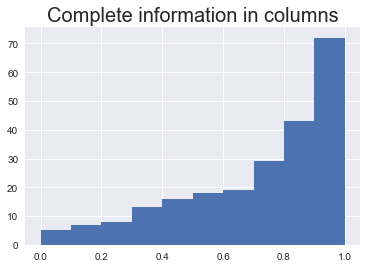

In [23]:
plt.hist(df.describe().iloc[0]/len(y), cumulative = True, density = False, histtype = 'stepfilled');
plt.title('Complete information in columns', fontsize = 20);

In [24]:
dfbkp = df 

In [25]:
df['type'] = pd.DataFrame(y).set_index(df.index)
weights = np.array(df.drop('type', axis =1).isnull().groupby(df.type).count())
df = df.drop('type', axis =1).isnull().groupby(df.type).mean()

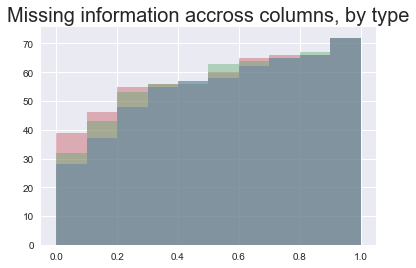

In [26]:
plt.hist(np.array(df).T, cumulative = True, density = False, histtype='stepfilled', alpha = .4);
plt.title("Missing information accross columns, by type", fontsize = 20);
# Note: There is an overlap, so it does not make sense to just stack the histograms

In [27]:
df

,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,auditfees,interest_payments,pretax_profit,...,operating_costs_as_pct_gp,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,difference,revenue_growth_pct,dividends
type,,,,,,,,,,,,,,,,,,,,,
ISV,0.609407,0.210634,0.190184,0.173824,0.263804,0.263804,0.069530,0.137014,0.302658,0.210634,...,0.390593,0.476483,0.065440,0.355828,0.186094,0.002045,0.390593,1.0,0.950920,1.0
MSP,0.770642,0.082569,0.055046,0.211009,0.174312,0.155963,0.045872,0.266055,0.146789,0.183486,...,0.201835,0.357798,0.027523,0.366972,0.055046,0.009174,0.201835,1.0,0.834862,1.0
Reseller,0.622951,0.061475,0.061475,0.213115,0.184426,0.077869,0.024590,0.213115,0.241803,0.049180,...,0.114754,0.303279,0.028689,0.262295,0.061475,0.008197,0.114754,1.0,0.663934,1.0


In [28]:
d = dfbkp

count    842.000000
mean       2.781663
std       17.334261
min        0.047933
25%        0.406314
50%        0.687837
75%        1.221924
max      296.097023
Name: total_assets, dtype: float64


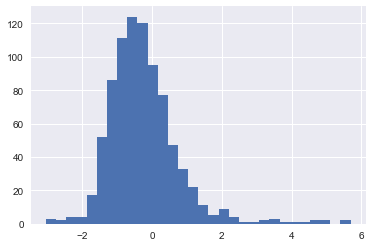

In [29]:
np.array([d[u'tangible_assets'].isnull(), d[u'intangible_assets'].isnull(), d[u'total_assets'].isnull()]).mean(axis = 1)
# Conclusion: work with total assets
print d[u'total_assets'].describe()
plt.hist(np.log(d[u'total_assets'][d[u'total_assets'].notnull()]), 30);

count    8.420000e+02
mean     1.537632e-05
std      2.138642e-04
min      0.000000e+00
25%      6.771819e-08
50%      1.870530e-07
75%      6.530532e-07
max      5.145830e-03
Name: liquidity_acid_test, dtype: float64

Zeros:  0.00475059382423


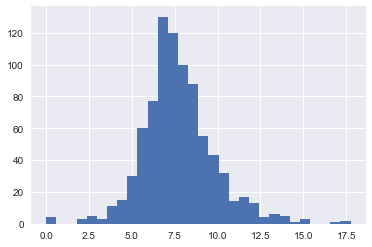

In [30]:
d[u'liquidity_acid_test'].isnull().mean()
# Conclusion: work with liquidity test
print d[u'liquidity_acid_test'].describe()
print "\nZeros: ", np.mean(d[u'liquidity_acid_test']==0)

# Had to change the scale...
plt.hist(np.log(d[u'liquidity_acid_test']*1e10+1), 30);

count    8.420000e+02
mean     2.635257e-05
std      6.876336e-04
min     -1.727916e-03
25%      1.657745e-08
50%      1.522866e-07
75%      6.400914e-07
max      1.977040e-02
Name: total_debt_ratio, dtype: float64

Negatives:  0.181710213777
Zeros:  0.00356294536817


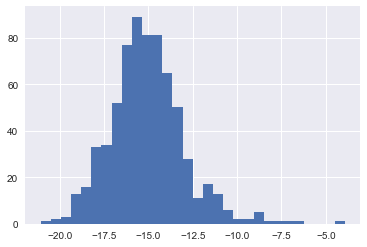

In [31]:
# Conclusion: work with debt ratio
print d[u'total_debt_ratio'].describe()
print "\nNegatives: ", np.mean(d[u'total_debt_ratio'] < 0)
print "Zeros: ", np.mean(d[u'total_debt_ratio'] == 0)

plt.hist(np.log(d[u'total_debt_ratio'][d[u'total_debt_ratio']>0]), 30);

count    745.000000
mean       1.676364
std       11.042790
min        0.001147
25%        0.098029
50%        0.238095
75%        0.550075
max      157.707246
Name: shareholder_funds, dtype: float64
Nulls:  0.115201900238


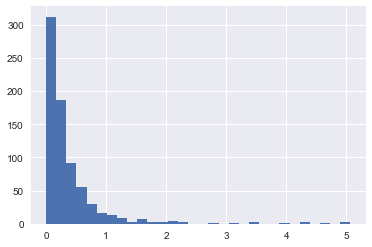

In [32]:
print d[u'shareholder_funds'].describe()
print "Nulls: ",d[u'shareholder_funds'].isnull().mean()

plt.hist(np.log(d[u'shareholder_funds'][d[u'shareholder_funds'].notnull()]+1), 30);

count    786.000000
mean       1.838328
std       10.865130
min        0.001147
25%        0.123286
50%        0.306796
75%        0.676124
max      140.151941
Name: capital_employed, dtype: float64


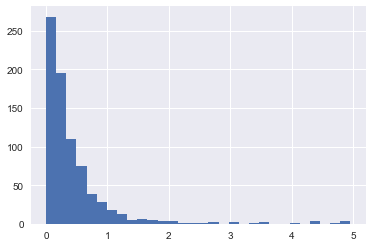

In [33]:
print d[u'capital_employed'].describe()
plt.hist(np.log(d[u'capital_employed'][d[u'capital_employed'].notnull()]+1), 30);

count    784.000000
mean       0.214913
std        0.276428
min        0.000049
25%        0.120054
50%        0.174358
75%        0.248154
max        6.238221
Name: trade_debtors, dtype: float64

Nulls:  0.0688836104513


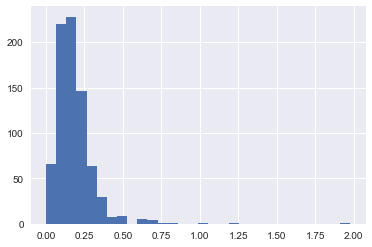

In [34]:
var = u'trade_debtors'
print d[var].describe()
print "\nNulls: ",d[var].isnull().mean()

plt.hist(np.log(d[var][d[var].notnull()]+1), 30);

count    819.000000
mean       0.313830
std        5.119073
min        0.000016
25%        0.028295
50%        0.066343
75%        0.120838
max      146.029260
Name: trade_creditors, dtype: float64

Nulls:  0.0273159144893


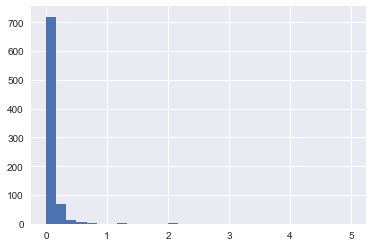

In [35]:
var = u'trade_creditors'
print d[var].describe()
print "\nNulls: ",d[var].isnull().mean()

plt.hist(np.log(d[var][d[var].notnull()]+1), 30);

count    786.000000
mean       1.838328
std       10.865130
min        0.001147
25%        0.123286
50%        0.306796
75%        0.676124
max      140.151941
Name: capital_employed, dtype: float64

Nulls:  0.0665083135392


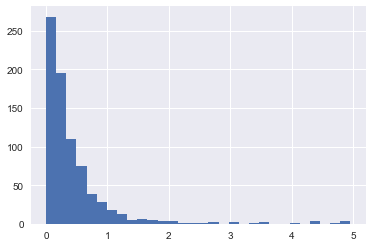

In [36]:
var = u'capital_employed'
print d[var].describe()
print "\nNulls: ",d[var].isnull().mean()

plt.hist(np.log(d[var][d[var].notnull()]+1), 30);

In [37]:
print d[u'number_of_employees'].isnull().mean()
print d[u'operating_costs_per_employee'].isnull().mean()
print d[u'operating_costs'].isnull().mean()
print d[u'gross_profit'].isnull().mean()
print d[u'operating_profit'].isnull().mean()

0.206650831354
0.410926365796
0.28622327791
0.13539192399
0.195961995249


In [38]:
var = [u'total_assets',u'liquidity_acid_test',u'total_debt_ratio',u'shareholder_funds',u'capital_employed',u'trade_debtors',u'trade_creditors']
print "Incomplete cases: ", d[var].isnull().any(axis=1).mean()
print "Incomplete cells: ", np.isnan(np.array(d[var])).mean()

Incomplete cases:  0.185273159145
Incomplete cells:  0.0397013912453


In [39]:
var = [u'total_assets',u'shareholder_funds',u'liquidity_acid_test',u'total_debt_ratio',u'capital_employed',u'trade_debtors',u'trade_creditors']
print "Incomplete cases: ", d[var].isnull().any(axis=1).mean()
print "Incomplete cells: ", np.isnan(np.array(d[var])).mean()
df = d
df['type'] = pd.DataFrame(y).set_index(df.index)
df = df.drop('type', axis =1)[var].isnull().groupby(df.type).describe().T
df

Incomplete cases:  0.185273159145
Incomplete cells:  0.0397013912453


type                          ISV    MSP Reseller
total_assets        count     489    109      244
                    unique      1      1        1
                    top     False  False    False
                    freq      489    109      244
shareholder_funds   count     489    109      244
                    unique      2      2        2
                    top     False  False    False
                    freq      410     98      237
liquidity_acid_test count     489    109      244
                    unique      1      1        1
                    top     False  False    False
                    freq      489    109      244
total_debt_ratio    count     489    109      244
                    unique      1      1        1
                    top     False  False    False
                    freq      489    109      244
capital_employed    count     489    109      244
                    unique      2      2        2
                    top     False  False    False
                    freq      443    104      239
trade_debtors       count     489    109      244
                    unique      2      2        2
                    top     False  False    False
                    freq      436    105      243
trade_creditors     count     489    109      244
                    unique      2      2        2
                    top     False  False    False
                    freq      470    106      243

In [40]:
df = d
df['type'] = pd.DataFrame(y).set_index(df.index)
df = df.drop('type', axis =1)[var].groupby(df.type).describe().T
df

type                                ISV           MSP      Reseller
total_assets        count  4.890000e+02  1.090000e+02  2.440000e+02
                    mean   3.495714e+00  3.232049e+00  1.149437e+00
                    std    2.096567e+01  1.169339e+01  9.624005e+00
                    min    4.793301e-02  1.519374e-01  1.425242e-01
                    25%    5.719452e-01  4.255742e-01  2.967692e-01
                    50%    9.227015e-01  7.605076e-01  4.080633e-01
                    75%    1.497501e+00  1.426701e+00  5.657256e-01
                    max    2.960970e+02  1.006672e+02  1.505259e+02
shareholder_funds   count  4.100000e+02  9.800000e+01  2.370000e+02
                    mean   2.286529e+00  1.244247e+00  7.994855e-01
                    std    1.283785e+01  5.902189e+00  9.109978e+00
                    min    7.825348e-03  6.136644e-03  1.146510e-03
                    25%    1.887354e-01  1.047560e-01  5.999620e-02
                    50%    3.995022e-01  2.393352e-01  9.820994e-02
                    75%    8.048682e-01  4.575224e-01  2.028852e-01
                    max    1.577072e+02  4.857346e+01  1.401316e+02
liquidity_acid_test count  4.890000e+02  1.090000e+02  2.440000e+02
                    mean   2.505559e-05  3.247277e-06  1.396438e-06
                    std    2.800303e-04  2.464633e-05  9.713931e-06
                    min    0.000000e+00  0.000000e+00  1.669945e-09
                    25%    9.520457e-08  3.569559e-08  5.488097e-08
                    50%    2.970778e-07  9.259745e-08  1.165810e-07
                    75%    9.647629e-07  3.629785e-07  2.918435e-07
                    max    5.145830e-03  2.563599e-04  1.395349e-04
total_debt_ratio    count  4.890000e+02  1.090000e+02  2.440000e+02
                    mean   2.760566e-06 -4.144068e-07  8.559066e-05
                    std    1.195371e-04  1.600569e-05  1.265970e-03
                    min   -1.727916e-03 -1.434508e-04 -1.093349e-04
                    25%    2.127966e-09  1.784906e-08  7.126208e-08
                    50%    1.137006e-07  1.211567e-07  2.469036e-07
                    75%    6.203847e-07  4.583881e-07  6.827835e-07
                    max    1.824441e-03  7.167243e-05  1.977040e-02
capital_employed    count  4.430000e+02  1.040000e+02  2.390000e+02
                    mean   2.221166e+00  2.530265e+00  8.276217e-01
                    std    1.179735e+01  1.043197e+01  9.071543e+00
                    min    1.651944e-02  6.136644e-03  1.146510e-03
                    25%    2.277452e-01  1.683715e-01  7.104433e-02
                    50%    4.642545e-01  3.506512e-01  1.234265e-01
                    75%    9.280582e-01  7.691326e-01  2.322856e-01
                    max    1.372943e+02  8.329347e+01  1.401519e+02
trade_debtors       count  4.360000e+02  1.050000e+02  2.430000e+02
                    mean   2.502058e-01  1.787715e-01  1.672068e-01
                    std    3.476237e-01  2.084963e-01  7.900183e-02
                    min    4.944317e-05  1.028287e-03  1.964879e-02
                    25%    1.280166e-01  8.477809e-02  1.196319e-01
                    50%    2.009131e-01  1.404780e-01  1.584392e-01
                    75%    2.932971e-01  1.974753e-01  2.021781e-01
                    max    6.238221e+00  1.727645e+00  6.713939e-01
trade_creditors     count  4.700000e+02  1.060000e+02  2.430000e+02
                    mean   4.436717e-01  2.016645e-01  1.116227e-01
                    std    6.750580e+00  6.358564e-01  7.821644e-02
                    min    1.649485e-05  7.937226e-03  2.010606e-03
                    25%    2.071524e-02  5.430923e-02  7.075196e-02
                    50%    4.031133e-02  8.459632e-02  9.926056e-02
                    75%    9.027670e-02  1.283809e-01  1.346238e-01
                    max    1.460293e+02  6.037463e+00  7.316612e-01

In [41]:
df = d
df['type'] = pd.DataFrame(y).set_index(df.index)
df = df.drop('type', axis =1)[var].groupby(df.type)

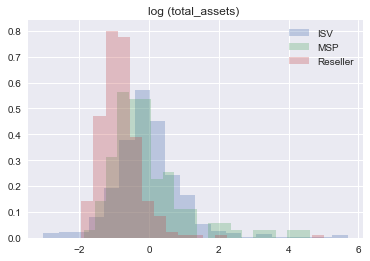

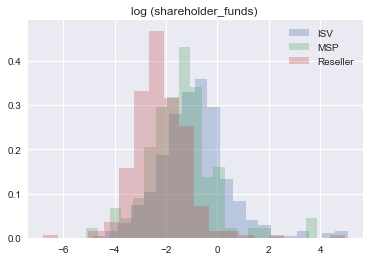

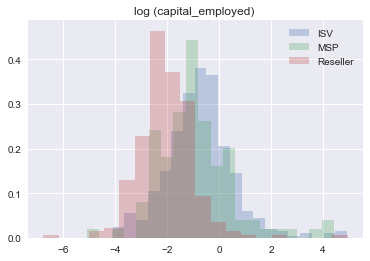

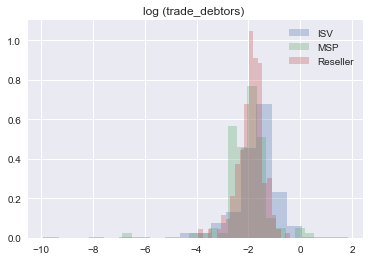

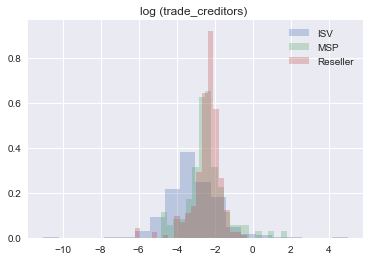

In [42]:
var = [u'total_assets',u'shareholder_funds',u'capital_employed',u'trade_debtors',u'trade_creditors']
for v in var:
    for index, group in df:
        plt.hist(np.log(group[v][group[v].notnull()]), 20, label = index, alpha = .3, density = True)
    plt.title("log (%s) "%(v))
    plt.legend()
    plt.show()

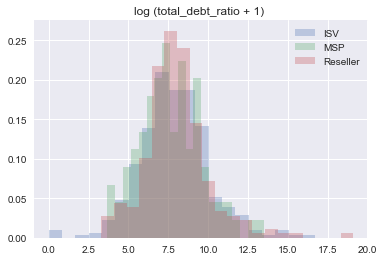

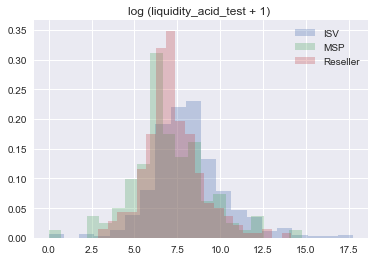

In [43]:
var = [u'total_debt_ratio',u'liquidity_acid_test']
for v in var:
    for index, group in df:
        plt.hist(np.log(group[v][group[v].notnull()][group[v]>=0]*1e10+1), 20, label = index, alpha = .3, density = True)
    plt.title("log (%s + 1) "%(v))
    plt.legend()
    plt.show()

In [44]:
var1 = [u'total_assets',u'shareholder_funds',u'capital_employed',u'trade_debtors',u'trade_creditors']
var2 = [u'total_debt_ratio',u'liquidity_acid_test']
dt = d
dt['type'] = pd.DataFrame(y).set_index(dt.index)
dt = dt[dt[list(np.append(var1,var2))].notnull().all(axis=1)][list(np.append(np.append(var1, var2),[u'type']))]

In [45]:
dt.head()

,total_assets,shareholder_funds,capital_employed,trade_debtors,trade_creditors,total_debt_ratio,liquidity_acid_test,type
organisation_id,,,,,,,,
6,0.293816,0.088375,0.112606,0.163492,0.120022,3.286804e-08,1.624408e-08,Reseller
8,0.275405,0.096914,0.175325,0.080328,0.060450,3.962185e-07,2.546451e-07,Reseller
10,0.553519,0.132767,0.141906,0.210860,0.267613,4.826092e-09,1.669945e-09,Reseller
12,0.428423,0.083213,0.084232,0.205744,0.131528,5.766971e-07,1.347955e-07,MSP
16,0.255231,0.023104,0.023222,0.141262,0.185737,9.250782e-08,9.437308e-09,Reseller


In [46]:
dt[var1] = np.log(dt[var1])
dt[var2] = np.sign(dt[var]) * np.log(np.abs(dt[var])*1e10)

dt.head()

,total_assets,shareholder_funds,capital_employed,trade_debtors,trade_creditors,total_debt_ratio,liquidity_acid_test,type
organisation_id,,,,,,,,
6,-1.224802,-2.426163,-2.183861,-1.810991,-2.120077,5.795086,5.090314,Reseller
8,-1.289514,-2.333929,-1.741116,-2.521635,-2.805934,8.284551,7.842456,Reseller
10,-0.591459,-2.019159,-1.952593,-1.556560,-1.318212,3.876622,2.815376,Reseller
12,-0.847645,-2.486354,-2.474179,-1.581123,-2.028533,8.659902,7.206344,MSP
16,-1.365586,-3.767771,-3.762662,-1.957140,-1.683422,6.829878,4.547256,Reseller


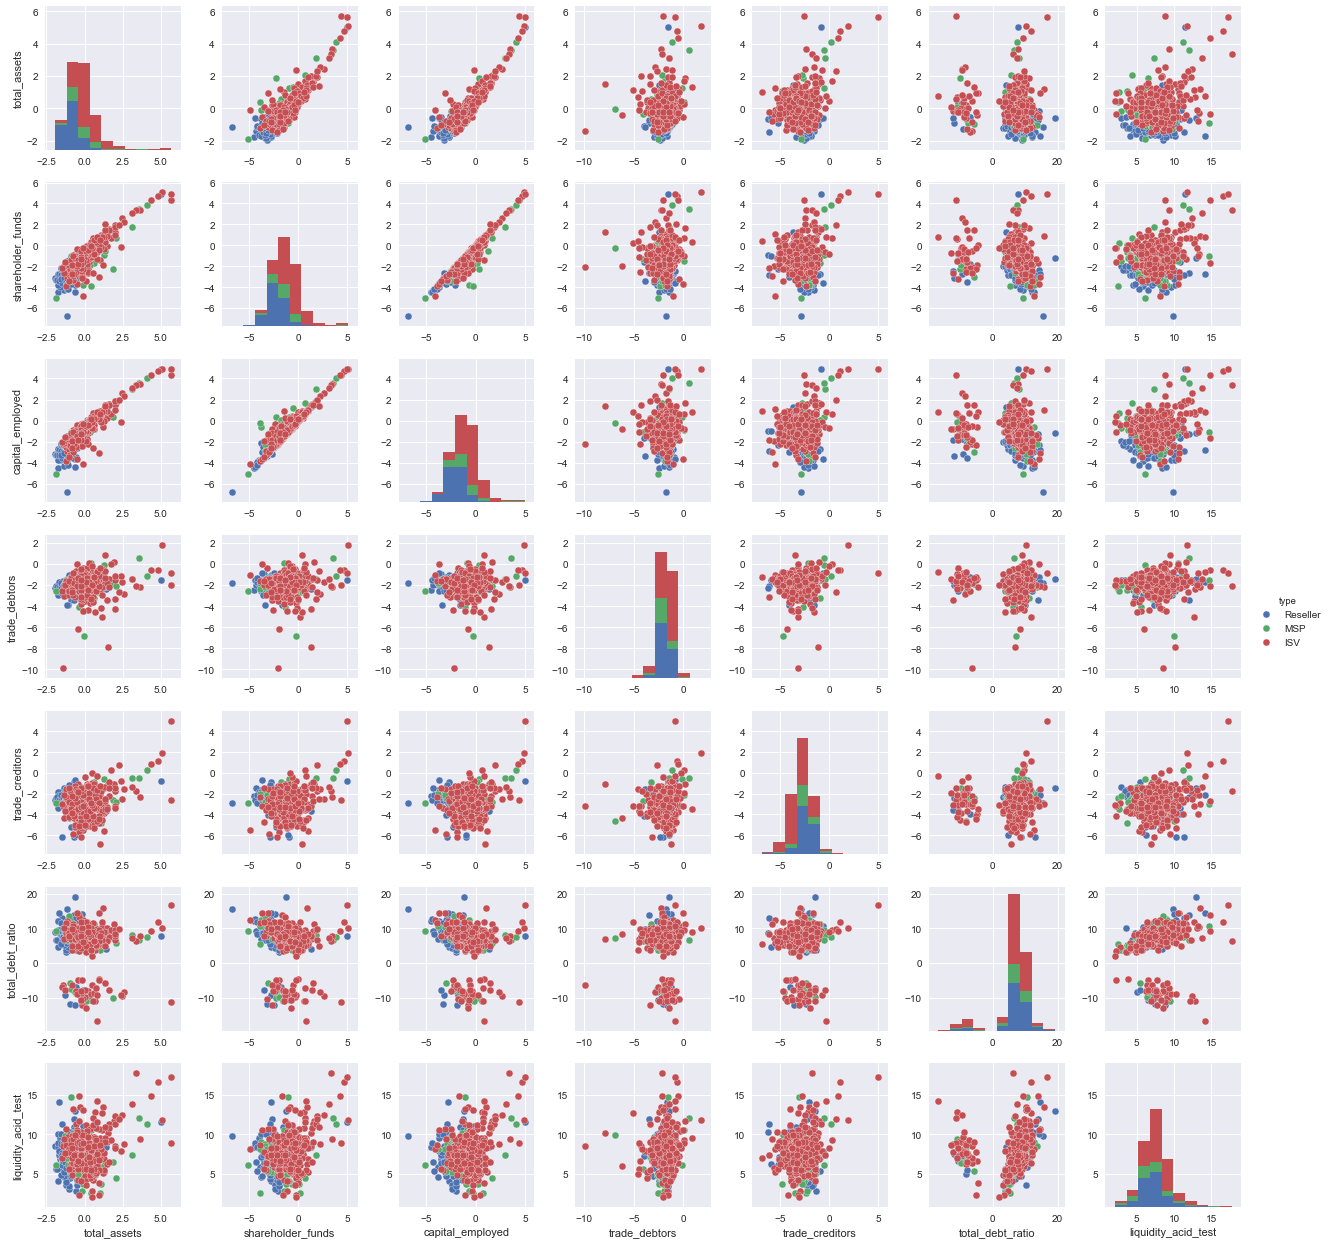

In [47]:
sns.pairplot(dt, hue = "type");

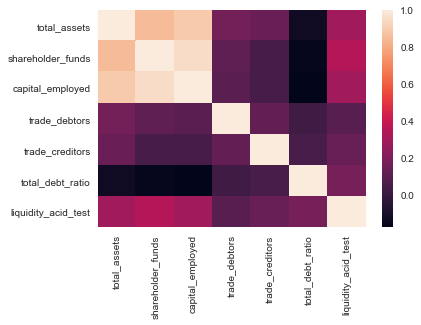

In [48]:
sns.heatmap(dt.corr());

In [49]:
dt.corr()

,total_assets,shareholder_funds,capital_employed,trade_debtors,trade_creditors,total_debt_ratio,liquidity_acid_test
total_assets,1.000000,0.855014,0.896989,0.173092,0.144705,-0.128519,0.297859
shareholder_funds,0.855014,1.000000,0.954056,0.114440,0.046672,-0.157854,0.346620
capital_employed,0.896989,0.954056,1.000000,0.101088,0.046862,-0.174754,0.297112
trade_debtors,0.173092,0.114440,0.101088,1.000000,0.126785,0.024744,0.095274
trade_creditors,0.144705,0.046672,0.046862,0.126785,1.000000,0.051409,0.137857
total_debt_ratio,-0.128519,-0.157854,-0.174754,0.024744,0.051409,1.000000,0.181409
liquidity_acid_test,0.297859,0.346620,0.297112,0.095274,0.137857,0.181409,1.000000


In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
X = dt[np.append(var1,var2)]
y = dt['type']

In [51]:
pca = PCA(n_components=2)
pca.fit(normalize(X))
print pca.explained_variance_ratio_.cumsum()
Xnew = pca.transform(X)

[ 0.72678323  0.88047717]


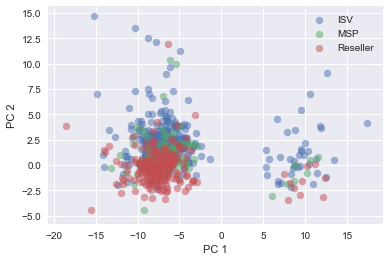

In [52]:
dnew = pd.DataFrame(Xnew, index = dt.index)
dnew['type'] = y
for index, data in dnew.groupby('type'):
    plt.scatter(data[0], data[1], label = index, alpha = .5)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import MultiLabelBinarizer

In [54]:
mb = MultiLabelBinarizer()
classes = {u'ISV':'a', u'MSP':'b', u'Reseller':'c'}
y = y.map(classes)
mb.fit(y)

MultiLabelBinarizer(classes=None, sparse_output=False)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(np.array(Xnew), mb.transform(y), test_size=0.2, random_state=0, shuffle = True, stratify = y)

In [56]:
# Does class proportions stays the same?
print 1.*y_train.sum(axis = 0)/y_train.sum()
print 1.*y_test.sum(axis = 0)/y_test.sum()

print 1.*mb.transform(y).sum(axis = 0)/mb.transform(y).sum()

[ 0.51824818  0.13868613  0.34306569]
[ 0.51449275  0.13768116  0.34782609]
[ 0.51749271  0.13848397  0.34402332]


In [57]:
mb.transform(y).sum(axis = 0)

array([355,  95, 236])

## Support vector classification

In [58]:
y_train = np.array(pd.DataFrame(y_train).apply(np.argmax, axis = 1))

In [59]:
clfva = svm.SVC(decision_function_shape='ovr', probability = True)
clfva.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
print 'Class accurracy: ', (clfva.predict(X_test) == np.array(pd.DataFrame(y_test).apply(np.argmax, axis = 1))).mean()

Class accurracy:  0.695652173913


In [61]:
from sklearn.metrics import confusion_matrix
y_pred = clfva.predict(X_test)
y_true = np.array(pd.DataFrame(y_test).apply(np.argmax, axis = 1))
confusion_matrix(y_true, y_pred)

array([[62,  0,  9],
       [12,  0,  7],
       [14,  0, 34]])

In [62]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, 
                         verbose = False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        if verbose: 
            print("Normalized confusion matrix")
    else:
        if verbose: 
            print('Confusion matrix, without normalization')

    if verbose: 
        print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [63]:
# Cases per class
y_test.sum(axis = 0)

array([71, 19, 48])

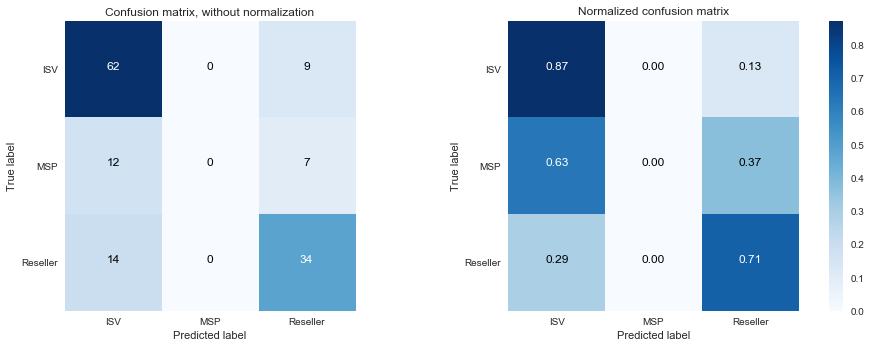

In [64]:
cnf_matrix = confusion_matrix(y_true, y_pred);
cnf_va = confusion_matrix(y_true, y_pred);
np.set_printoptions(precision=2);
sns.set_style("dark");

plt.figure(figsize=[15,5]);
# Plot non-normalized confusion matrix
plt.subplot(1,2,1)
plot_confusion_matrix(cnf_matrix, classes = ['ISV', 'MSP', 'Reseller'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(1,2,2)
plot_confusion_matrix(cnf_matrix, 
                      classes = ['ISV', 'MSP', 'Reseller'],
                      normalize=True,
                      title='Normalized confusion matrix')

In [65]:
# How many support vectors per class?
clfva.n_support_

array([179,  76, 143], dtype=int32)

In [66]:
clfva.score(X_train, y_train)

0.71715328467153283

In [67]:
xx = np.linspace(-20, 20, 500)
yy = np.linspace(-5, 20, 500).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

In [68]:
preds = clfva.predict_log_proba(Xfull)

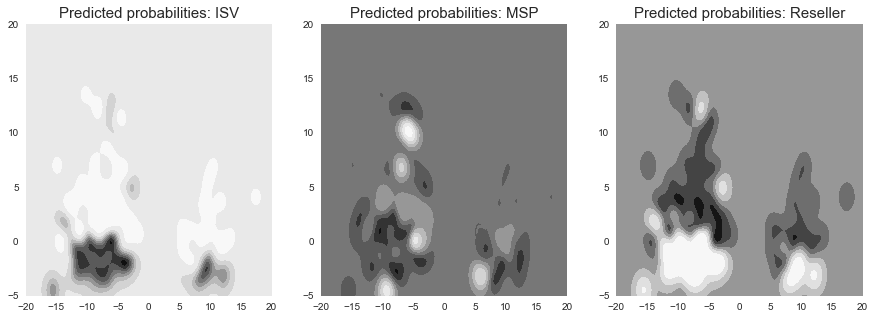

In [75]:
dnew = pd.DataFrame(Xnew, index = dt.index)
dnew['type'] = y
i = 0
plt.figure(figsize=[15,5])
classes = ['ISV', 'MSP', 'Reseller']

for index, data in dnew.groupby('type'):
    plt.subplot(1,3,i+1)
    plt.contourf(xx, yy, preds[:, i].reshape((500, 500)), cmap = 'Greys_r', zorder = 1);
    plt.title('Predicted probabilities: %s'%(classes[i]), Fontsize = 15)
    #plt.scatter(data[0], data[1], label = index, alpha = .9, zorder = 2)
    i += 1

## Incorporating class weights

In [77]:
# Class weights
1.*y_test.sum(axis = 0).sum()/y_test.sum(axis = 0)

array([ 1.94,  7.26,  2.88])

In [78]:
clfcw = svm.SVC(decision_function_shape='ovr', class_weight = {0:2,1:4,2:2}, probability=True)

In [79]:
clfcw.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight={0: 2, 1: 4, 2: 2}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
print 'Class accurracy: ', (clfcw.predict(X_test) == np.array(pd.DataFrame(y_test).apply(np.argmax, axis = 1))).mean()

Class accurracy:  0.644927536232


In [81]:
y_pred = clfcw.predict(X_test)
y_true = np.array(pd.DataFrame(y_test).apply(np.argmax, axis = 1))
confusion_matrix(y_true, y_pred)

array([[54,  9,  8],
       [11,  1,  7],
       [12,  2, 34]])

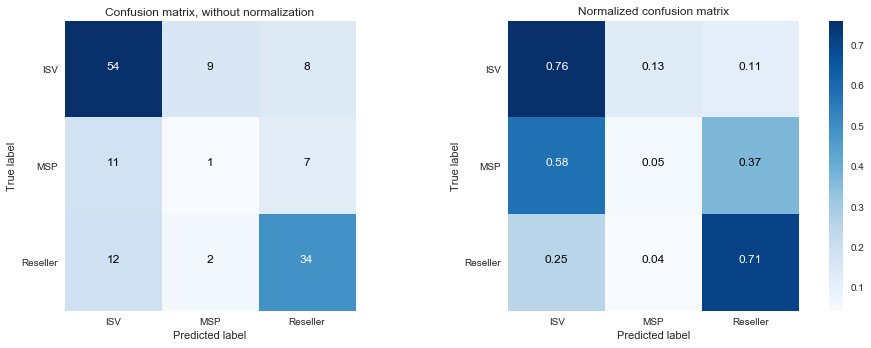

In [82]:
cnf_matrix = confusion_matrix(y_true, y_pred);
np.set_printoptions(precision=2);
plt.figure(figsize=[15,5])

# Plot non-normalized confusion matrix
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes = ['ISV', 'MSP', 'Reseller'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, 
                      classes = ['ISV', 'MSP', 'Reseller'],
                      normalize=True,
                      title='Normalized confusion matrix')

In [83]:
preds = clfcw.predict_log_proba(Xfull)

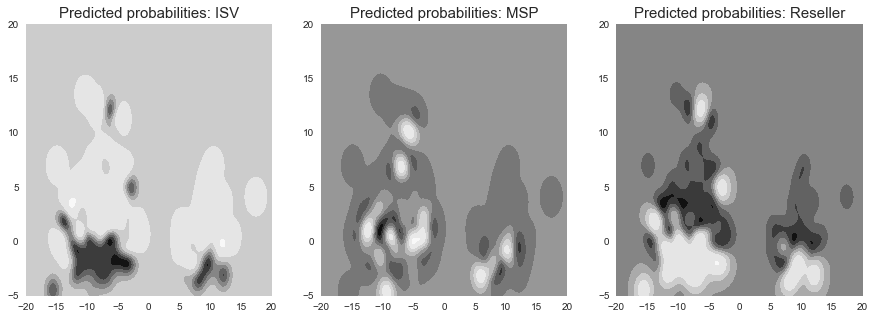

In [84]:
i = 0
plt.figure(figsize=[15,5])
classes = ['ISV', 'MSP', 'Reseller']

for index, data in dnew.groupby('type'):
    plt.subplot(1,3,i+1)
    plt.contourf(xx, yy, preds[:, i].reshape((500, 500)), cmap = 'Greys_r', zorder = 1);
    plt.title('Predicted probabilities: %s'%(classes[i]), Fontsize = 15)
    #plt.scatter(data[0], data[1], label = index, alpha = .9, zorder = 2)
    i += 1

## Cross validation

In [85]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

C_range = np.logspace(-2, 5, 5)
gamma_range = np.logspace(-9, 3, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [86]:
grid = GridSearchCV(SVC(decision_function_shape='ovr', 
                        class_weight = {0:2,1:4,2:2}), 
                    param_grid=param_grid, cv=cv, 
                   scoring='accuracy', verbose=1)
grid.fit(X, np.array(pd.DataFrame(mb.transform(y)).apply(np.argmax, axis = 1)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   25.0s finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight={0: 2, 1: 4, 2: 2}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   5.62341e-01,   3.16228e+01,   1.77828e+03,
         1.00000e+05]), 'gamma': array([  1.00000e-09,   1.00000e-06,   1.00000e-03,   1.00000e+00,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [87]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1778.2794100389228, 'gamma': 0.001} with a score of 0.74


In [88]:
y_pred = grid.predict(X)
y_true = np.array(pd.DataFrame(mb.transform(y)).apply(np.argmax, axis = 1))

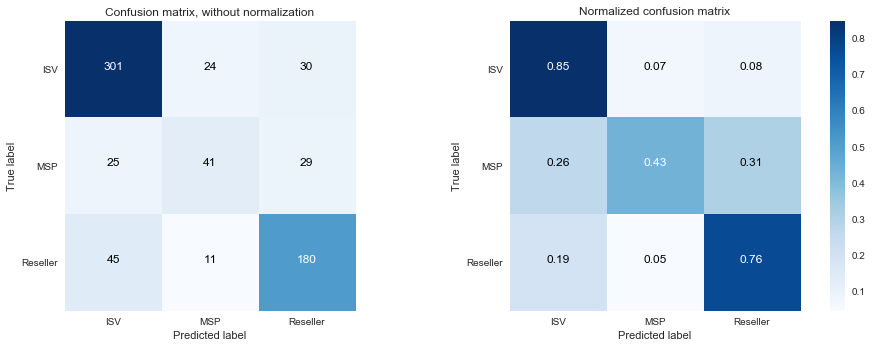

In [89]:
cnf_matrix = confusion_matrix(y_true, y_pred);
np.set_printoptions(precision=2);
plt.figure(figsize = [15,5])

# Plot non-normalized confusion matrix
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes = ['ISV', 'MSP', 'Reseller'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, 
                      classes = ['ISV', 'MSP', 'Reseller'],
                      normalize=True,
                      title='Normalized confusion matrix')

## Cross validation with no weights

In [90]:
gridnw = GridSearchCV(SVC(decision_function_shape='ovr'), 
                    param_grid=param_grid, cv=cv, 
                   scoring='accuracy', verbose=1)
gridnw.fit(X, np.array(pd.DataFrame(mb.transform(y)).apply(np.argmax, axis = 1)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   12.4s finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   5.62341e-01,   3.16228e+01,   1.77828e+03,
         1.00000e+05]), 'gamma': array([  1.00000e-09,   1.00000e-06,   1.00000e-03,   1.00000e+00,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [91]:
print("The best parameters are %s with a score of %0.2f"
      % (gridnw.best_params_, gridnw.best_score_))

The best parameters are {'C': 1778.2794100389228, 'gamma': 0.001} with a score of 0.73


In [92]:
y_pred = gridnw.predict(X)
y_true = np.array(pd.DataFrame(mb.transform(y)).apply(np.argmax, axis = 1))

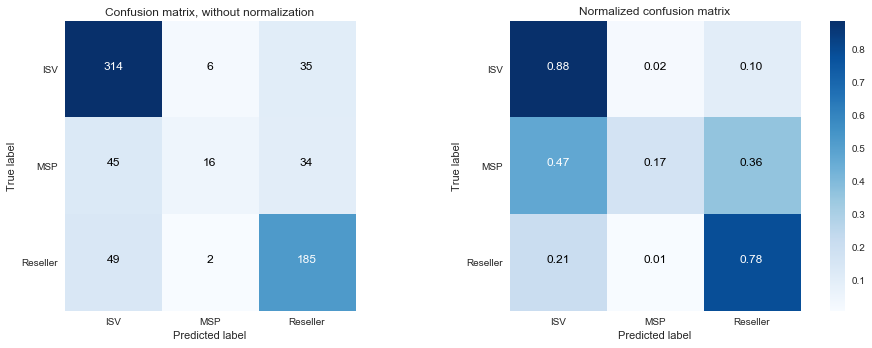

In [93]:
cnf_matrix = confusion_matrix(y_true, y_pred);
np.set_printoptions(precision=2);
plt.figure(figsize = [15,5])

# Plot non-normalized confusion matrix
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes = ['ISV', 'MSP', 'Reseller'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, 
                      classes = ['ISV', 'MSP', 'Reseller'],
                      normalize=True,
                      title='Normalized confusion matrix')

In [94]:
gridnw.score(X,y_true)

0.75072886297376096

## Controlling the number of support vectors

In [95]:
from sklearn.svm import NuSVC

In [96]:
clfnu = svm.NuSVC(decision_function_shape='ovr', probability = True, nu = .01)
clfnu.fit(X_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.01, probability=True, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [97]:
print 'Class accurracy: ', (clfnu.predict(X_test) == np.array(pd.DataFrame(y_test).apply(np.argmax, axis = 1))).mean()

Class accurracy:  0.376811594203


In [98]:
clfnu.n_support_

array([70, 57, 88], dtype=int32)

In [99]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats = 20, random_state=42)
# cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [100]:
gridnu = GridSearchCV(NuSVC(decision_function_shape='ovr', 
                           class_weight = {0:2,1:4,2:2}), 
                      param_grid = dict(nu = np.logspace(-10,-1,20), 
                                        gamma = np.logspace(-9, 3, 10)),
                      cv=cv, 
                      scoring='accuracy', 
                      verbose=1)
gridnu.fit(X, np.array(pd.DataFrame(mb.transform(y)).apply(np.argmax, axis = 1)))

Fitting 60 folds for each of 200 candidates, totalling 12000 fits


[Parallel(n_jobs=1)]: Done 12000 out of 12000 | elapsed:  1.3min finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1104d1b50>,
       error_score='raise',
       estimator=NuSVC(cache_size=200, class_weight={0: 2, 1: 4, 2: 2}, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'nu': array([  1.00000e-10,   2.97635e-10,   8.85867e-10,   2.63665e-09,
         7.84760e-09,   2.33572e-08,   6.95193e-08,   2.06914e-07,
         6.15848e-07,   1.83298e-06,   5.45559e-06,   1.62378e-05,
         4.83293e-05,   1.43845e-04,   4.28133e-04,   1.27427e-03,
         3.792...    2.15443e-04,   4.64159e-03,   1.00000e-01,   2.15443e+00,
         4.64159e+01,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [101]:
print("The best parameters are %s with a score of %0.2f"
      % (gridnu.best_params_, gridnu.best_score_))

The best parameters are {'nu': 0.10000000000000001, 'gamma': 2.154434690031878} with a score of 0.65


In [102]:
y_pred = gridnu.predict(X)
y_true = np.array(pd.DataFrame(mb.transform(y)).apply(np.argmax, axis = 1))

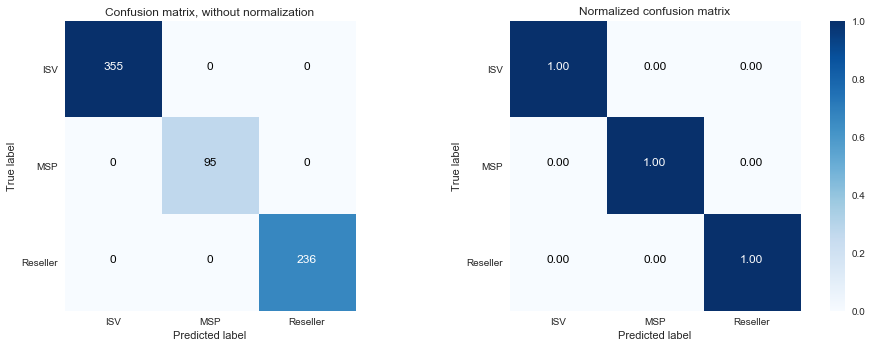

In [103]:
cnf_matrix = confusion_matrix(y_true, y_pred);
np.set_printoptions(precision=2);
plt.figure(figsize = [15,5])

# Plot non-normalized confusion matrix
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes = ['ISV', 'MSP', 'Reseller'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, 
                      classes = ['ISV', 'MSP', 'Reseller'],
                      normalize=True,
                      title='Normalized confusion matrix')

In [104]:
gridnu.best_params_

{'gamma': 2.154434690031878, 'nu': 0.10000000000000001}

## Am I overfitting?... Sadly, yes...

In [105]:
clfnu = svm.NuSVC(decision_function_shape='ovr', probability = True, 
                  nu = gridnu.best_params_['nu'], 
                 gamma = gridnu.best_params_['gamma'])
clfnu.fit(X_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=2.154434690031878,
   kernel='rbf', max_iter=-1, nu=0.10000000000000001, probability=True,
   random_state=None, shrinking=True, tol=0.001, verbose=False)

In [106]:
clfnu.n_support_

array([136,  68, 116], dtype=int32)

In [107]:
print 'Class accurracy: ', (clfnu.predict(X_test) == np.array(pd.DataFrame(y_test).apply(np.argmax, axis = 1))).mean()

Class accurracy:  0.594202898551


In [108]:
y_pred = clfnu.predict(X_test)
y_true = np.array(pd.DataFrame(y_test).apply(np.argmax, axis = 1))
confusion_matrix(y_true, y_pred)

array([[57,  5,  9],
       [13,  1,  5],
       [19,  5, 24]])

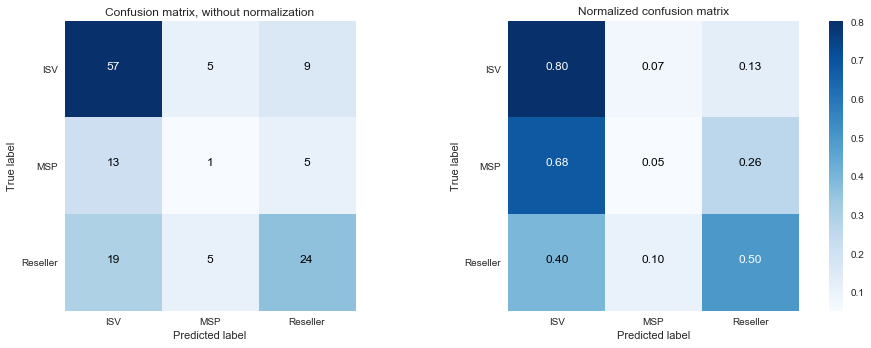

In [109]:
cnf_matrix = confusion_matrix(y_true, y_pred);
np.set_printoptions(precision=2);
plt.figure(figsize = [15,5])

# Plot non-normalized confusion matrix
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes = ['ISV', 'MSP', 'Reseller'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, 
                      classes = ['ISV', 'MSP', 'Reseller'],
                      normalize=True,
                      title='Normalized confusion matrix')